In [1]:
from bootstrap import *

In [2]:
file_interest_rates = "../interest-rates.xlsx"
file_tenor_dates = "../tenor-dates.xlsx"

In [3]:
df_ir = pd.read_excel(file_interest_rates)
df_ir

,Maturity Dates,Market Quotes,Source
0,2012-10-04,0.0950,LIBOR
1,2012-11-05,0.1160,LIBOR
2,2013-01-03,0.2230,LIBOR
3,2013-04-03,0.4380,LIBOR
4,2013-06-19,99.7860,Futures
5,2013-09-18,99.7520,Futures
6,2013-12-18,99.7230,Futures
7,2014-03-19,99.6690,Futures
8,2014-10-03,0.4750,Swap
9,2015-10-05,0.5860,Swap


In [4]:
df_td = pd.read_excel(file_tenor_dates)
df_td.head(12)

,TenorTime,Tenor
0,o/n,2012-10-04
1,NaN,2012-11-05
2,NaN,2013-01-03
3,NaN,2013-03-20
4,NaN,2013-04-03
5,NaN,2013-06-19
6,NaN,2013-09-18
7,1,2013-10-03
8,NaN,2013-12-18
9,NaN,2014-03-19


In [5]:
spot_date =  pd.to_datetime("10/03/2012")
spot_date

Timestamp('2012-10-03 00:00:00')

In [6]:
# LIBOR discount curve

In [7]:
libors = []
for i in range (4):
    libors.append(LiborDeposit(spot_date, df_ir["Maturity Dates"][i], df_ir["Market Quotes"][i]))

In [8]:
libors

[LiborDeposit(spot_date=Timestamp('2012-10-03 00:00:00'), maturity_date=Timestamp('2012-10-04 00:00:00'), quote_pct=np.float64(0.095)),
 LiborDeposit(spot_date=Timestamp('2012-10-03 00:00:00'), maturity_date=Timestamp('2012-11-05 00:00:00'), quote_pct=np.float64(0.116)),
 LiborDeposit(spot_date=Timestamp('2012-10-03 00:00:00'), maturity_date=Timestamp('2013-01-03 00:00:00'), quote_pct=np.float64(0.223)),
 LiborDeposit(spot_date=Timestamp('2012-10-03 00:00:00'), maturity_date=Timestamp('2013-04-03 00:00:00'), quote_pct=np.float64(0.438))]

In [9]:
fw1 = ForwardsDeposit(start_date=pd.Timestamp('2013-03-20 00:00:00'),
                maturity_date=pd.Timestamp('2013-06-19 00:00:00'), quote_pct=np.float64(99.786) )
fw2 = ForwardsDeposit(start_date=pd.Timestamp('2013-06-19 00:00:00'),
                maturity_date=pd.Timestamp('2013-09-18 00:00:00'), quote_pct=np.float64(99.7520 ) )

fw3 = ForwardsDeposit(start_date=pd.Timestamp('2013-09-18 00:00:00'),
                maturity_date=pd.Timestamp('2013-12-18 00:00:00'), quote_pct=np.float64(99.7230 ) )

fw4 = ForwardsDeposit(start_date=pd.Timestamp('2013-12-18 00:00:00'),
                maturity_date=pd.Timestamp('2014-03-19 00:00:00'), quote_pct=np.float64(99.6690 ) )

In [10]:
libors.append(fw1)
libors.append(fw2)
libors.append(fw3)
libors.append(fw4)

In [11]:
libors

[LiborDeposit(spot_date=Timestamp('2012-10-03 00:00:00'), maturity_date=Timestamp('2012-10-04 00:00:00'), quote_pct=np.float64(0.095)),
 LiborDeposit(spot_date=Timestamp('2012-10-03 00:00:00'), maturity_date=Timestamp('2012-11-05 00:00:00'), quote_pct=np.float64(0.116)),
 LiborDeposit(spot_date=Timestamp('2012-10-03 00:00:00'), maturity_date=Timestamp('2013-01-03 00:00:00'), quote_pct=np.float64(0.223)),
 LiborDeposit(spot_date=Timestamp('2012-10-03 00:00:00'), maturity_date=Timestamp('2013-04-03 00:00:00'), quote_pct=np.float64(0.438)),
 ForwardsDeposit(start_date=Timestamp('2013-03-20 00:00:00'), maturity_date=Timestamp('2013-06-19 00:00:00'), quote_pct=np.float64(99.786)),
 ForwardsDeposit(start_date=Timestamp('2013-06-19 00:00:00'), maturity_date=Timestamp('2013-09-18 00:00:00'), quote_pct=np.float64(99.752)),
 ForwardsDeposit(start_date=Timestamp('2013-09-18 00:00:00'), maturity_date=Timestamp('2013-12-18 00:00:00'), quote_pct=np.float64(99.723)),
 ForwardsDeposit(start_date=Times

In [12]:
disc_curve = bootstrap_curve(spot_date, libors)

In [13]:
disc_curve.rates

{Timestamp('2012-10-04 00:00:00'): np.float64(0.00095),
 Timestamp('2012-11-05 00:00:00'): np.float64(0.00116),
 Timestamp('2013-01-03 00:00:00'): np.float64(0.00223),
 Timestamp('2013-04-03 00:00:00'): np.float64(0.00438),
 Timestamp('2013-06-19 00:00:00'): np.float64(0.0021400000000000308),
 Timestamp('2013-09-18 00:00:00'): np.float64(0.0024800000000000377),
 Timestamp('2013-12-18 00:00:00'): np.float64(0.00277000000000005),
 Timestamp('2014-03-19 00:00:00'): np.float64(0.003310000000000035)}

In [14]:
disc_factor = []

disc_dates = [] 

for i in range(5):
    disc_f = disc_curve.get_discount_factor_libor( df_td["Tenor"][i] )
    disc_factor.append(round(disc_f, 6))
    disc_dates.append( df_td["Tenor"][i])

In [15]:
disc_factor

[np.float64(0.999997),
 np.float64(0.999894),
 np.float64(0.99943),
 np.float64(0.998116),
 np.float64(0.997791)]

In [16]:
# get the discount factor and rate on 19/06/2013

fw0_disc_factor = disc_curve.get_discount_factor_libor( df_td["Tenor"][3] )

fw1_disc_factor = fw1.get_discount_factor( fw0_disc_factor)
fw1_disc_factor

np.float64(0.9975759984277284)

In [17]:
# get the discount factor and the rate on 18/09/2013

fw2_disc_factor = fw2.get_discount_factor(fw1_disc_factor)
fw2_disc_factor

np.float64(0.9969510209099535)

In [18]:
# get the discount factor and the rate on 18/12/2013

fw3_disc_factor = fw3.get_discount_factor(fw2_disc_factor)
fw3_disc_factor

np.float64(0.9962534497791594)

In [19]:
# get the discount factor and the rate on 19/03/2014

fw4_disc_factor = fw4.get_discount_factor(fw3_disc_factor)
fw4_disc_factor

np.float64(0.995420586904211)

In [20]:
# get discount rate on 18/09/2013

round( fw2.get_spot_rate(fw2_disc_factor, spot_date), 6)

np.float64(0.003146)

In [26]:
# get discount rate on 18/12/2013

round( fw3.get_spot_rate(fw3_disc_factor, spot_date), 6)

np.float64(0.00307)

In [27]:
# let's try to get a discount factor at 03/10/2013 = df_td["Tenor"][7]
# we try to interpolate the rate between the neighbouring dates 18/09/2013 and 18/12/2013

In [39]:
t1 = yearfrac(pd.Timestamp('2013-10-03 00:00:00'), pd.Timestamp('2013-12-18 00:00:00'))
t2 = yearfrac(pd.Timestamp('2013-09-18 00:00:00'), pd.Timestamp('2013-12-18 00:00:00'))


r1 = fw2.get_spot_rate(fw2_disc_factor, spot_date)
r2 = fw3.get_spot_rate(fw3_disc_factor, spot_date)

q = t1 / t2

# yield curve is linear in time
rate10_03 = r1 * q + (1 - q) * r2
rate10_03

np.float64(0.0031331936850468906)

In [43]:
disc_f_10_03 = 1 / (1+rate10_03 * yearfrac(spot_date, pd.Timestamp('2013-10-03 00:00:00')))
disc_f_10_03

np.float64(0.9968333492678774)

In [25]:
# check discount curve 
AAAAAAAAAAAAAAAAAAA

NameError: name 'AAAAAAAAAAAAAAAAAAA' is not defined

In [41]:
for i in range(4, 8):
    disc_dates.append(df_ir["Maturity Dates"][i] )

disc_dates.append(pd.Timestamp('2013-10-03 00:00:00'))

In [44]:
disc_factor.append(fw1_disc_factor)
disc_factor.append(fw2_disc_factor)
disc_factor.append(fw3_disc_factor)
disc_factor.append(fw4_disc_factor)
disc_factor.append(disc_f_10_03)

In [45]:
# disc_factor

[np.float64(0.999997),
 np.float64(0.999894),
 np.float64(0.99943),
 np.float64(0.998116),
 np.float64(0.997791),
 np.float64(0.9975759984277284),
 np.float64(0.9969510209099535),
 np.float64(0.9962534497791594),
 np.float64(0.995420586904211),
 np.float64(0.9968333492678774)]

In [46]:
# disc_dates

[Timestamp('2012-10-04 00:00:00'),
 Timestamp('2012-11-05 00:00:00'),
 Timestamp('2013-01-03 00:00:00'),
 Timestamp('2013-03-20 00:00:00'),
 Timestamp('2013-04-03 00:00:00'),
 Timestamp('2013-06-19 00:00:00'),
 Timestamp('2013-09-18 00:00:00'),
 Timestamp('2013-12-18 00:00:00'),
 Timestamp('2014-03-19 00:00:00'),
 Timestamp('2013-10-03 00:00:00')]

In [47]:
len(disc_factor) == len(disc_dates)

True

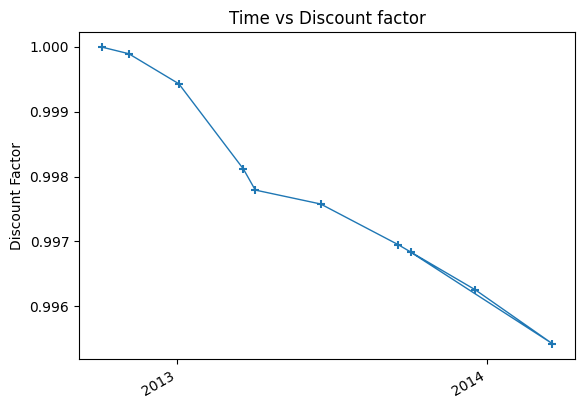

In [48]:
import matplotlib.dates as mdates

ax = plt.gca()

plt.scatter(disc_dates, disc_factor, marker = "+")
plt.plot(disc_dates, disc_factor, linestyle="-", linewidth=1)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

# Show only the year
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_major_locator(mdates.YearLocator())

plt.ylabel("Discount Factor")
plt.title("Time vs Discount factor")
plt.gcf().autofmt_xdate()
plt.show()
